In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Index(['Unnamed: 0', 'Team', 'League', 'Year', 'RS', 'RA', 'W', 'OBP', 'SLG',
       'BA', 'Playoffs', 'RankSeason', 'RankPlayoffs', 'G', 'OOBP', 'OSLG'],
      dtype='object')


<AxesSubplot:>

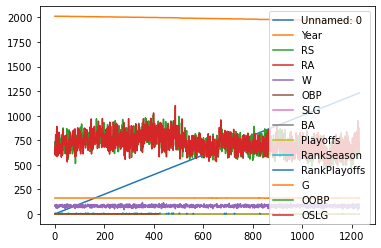

In [2]:
#df=pd.read_csv('https://raw.githubusercontent.com/rsravan91/Moneyball-baseball/master/baseball.csv')
#df.to_csv('baseball_stats.csv')
df=pd.read_csv('baseball_stats.csv')
print(df.columns)
df.plot()



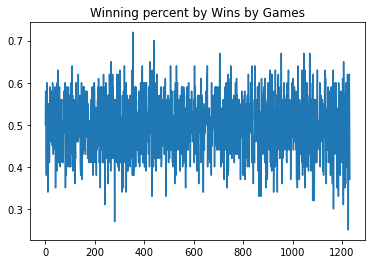

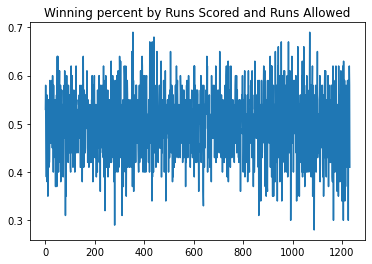

In [3]:
#https://sportsstatsanalysis.wordpress.com/2009/06/28/run-differential-predictive-of-wins/
    
def calc_win_perc(wins, games_played):
    win_percent=wins/games_played
    return np.round(win_percent,2)

def calc_win_perc2(runs_scored,runs_allowed):
    win_percent=(runs_scored)**2/((runs_scored)**2+(runs_allowed)**2)
    return np.round(win_percent,2)
                     
win_perc_list=[]
win_perc_list2=[]
for i, row in df.iterrows():
    wins=row['W']
    games_played=row['G']
    runs_scored=row['RS']
    runs_allowed=row['RA']
    win_perc_list.append(calc_win_perc(wins,games_played))
    win_perc_list2.append(calc_win_perc2(runs_scored,runs_allowed))
                              

df['WP']=win_perc_list
df['WP2']=win_perc_list2

df['WP'].plot()
plt.title('Winning percent by Wins by Games')                     
plt.show()
                     
df['WP2'].plot()
plt.title('Winning percent by Runs Scored and Runs Allowed')                                          
plt.show()



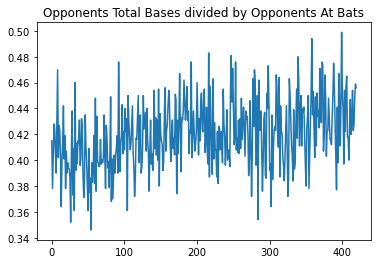

In [4]:
df['OSLG'].plot()
plt.title('Opponents Total Bases divided by Opponents At Bats')
plt.show()

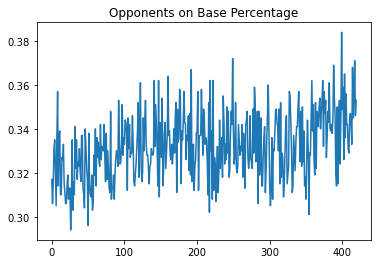

In [5]:
df['OOBP'].plot()
plt.title('Opponents on Base Percentage')
plt.show()

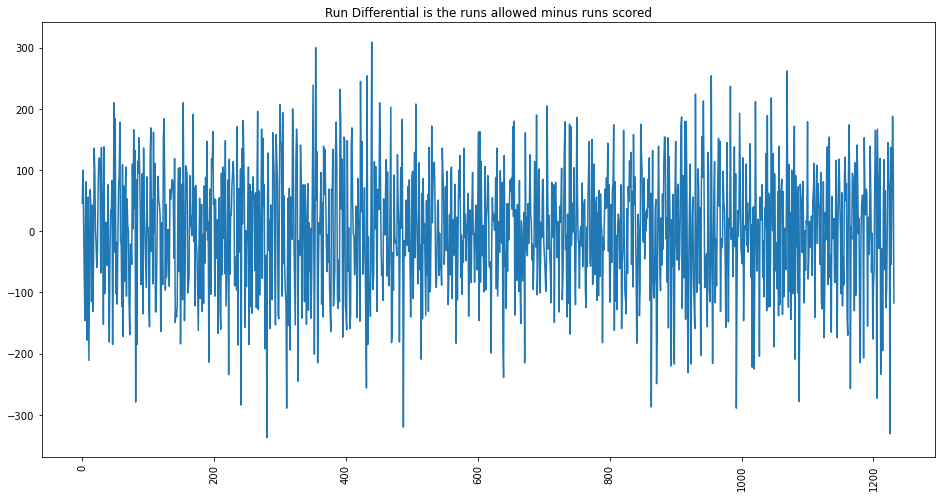

In [6]:
def calc_run_diff(runs_scored, runs_allowed):
    run_diff = runs_scored - runs_allowed
    return run_diff

run_diffs = []

# Write a for loop and collect runs allowed and runs scored for each row
for i,row in df.iterrows():
    runs_scored = row['RS']
    runs_allowed = row['RA']
    run_diff = calc_run_diff(runs_scored,runs_allowed)
    run_diffs.append(run_diff)

fig,ax=plt.subplots(figsize=(16,8))
df['RD'] = run_diffs
plt.title('Run Differential is the runs allowed minus runs scored')    
df['RD'].plot(ax=ax)
plt.xticks(rotation=90)
plt.show()


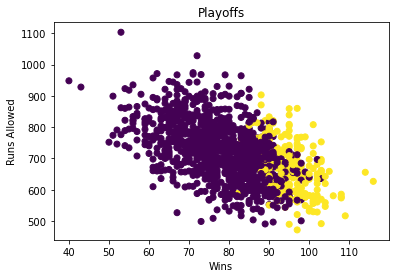

Keep the Runs Allowed low to reach the playoffs


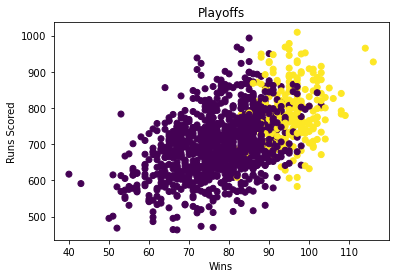

Keep the Runs Scored high to reach the playoffs


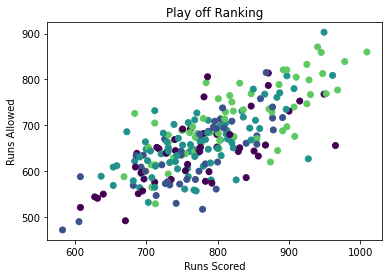

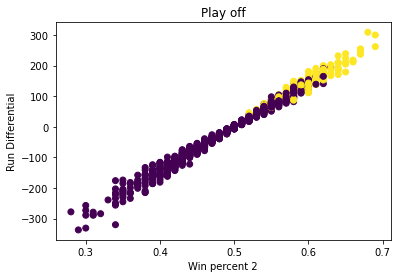

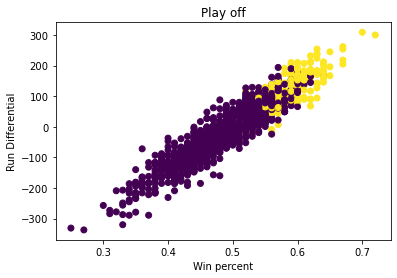

Keep the win percent and run different high to reach playoffs


In [7]:
plt.scatter(x='W',y='RA',data=df,c='Playoffs')
plt.xlabel('Wins')
plt.ylabel('Runs Allowed')
plt.title('Playoffs')
plt.show()
print("Keep the Runs Allowed low to reach the playoffs")
plt.scatter(x='W',y='RS',data=df,c='Playoffs')
plt.xlabel('Wins')
plt.ylabel('Runs Scored')
plt.title('Playoffs')
plt.show()
print("Keep the Runs Scored high to reach the playoffs")
plt.scatter(x='RS',y='RA',data=df,c='RankPlayoffs')
plt.xlabel('Runs Scored')
plt.ylabel('Runs Allowed')
plt.title('Play off Ranking')
plt.show()

plt.scatter(x='WP2',y='RD',data=df,c='Playoffs')
plt.title('Play off')
plt.xlabel('Win percent 2')
plt.ylabel('Run Differential')
plt.show()

plt.scatter(x='WP',y='RD',data=df,c='Playoffs')
plt.title('Play off')
plt.xlabel('Win percent')
plt.ylabel('Run Differential')
plt.show()

print('Keep the win percent and run different high to reach playoffs')

<Figure size 432x288 with 0 Axes>

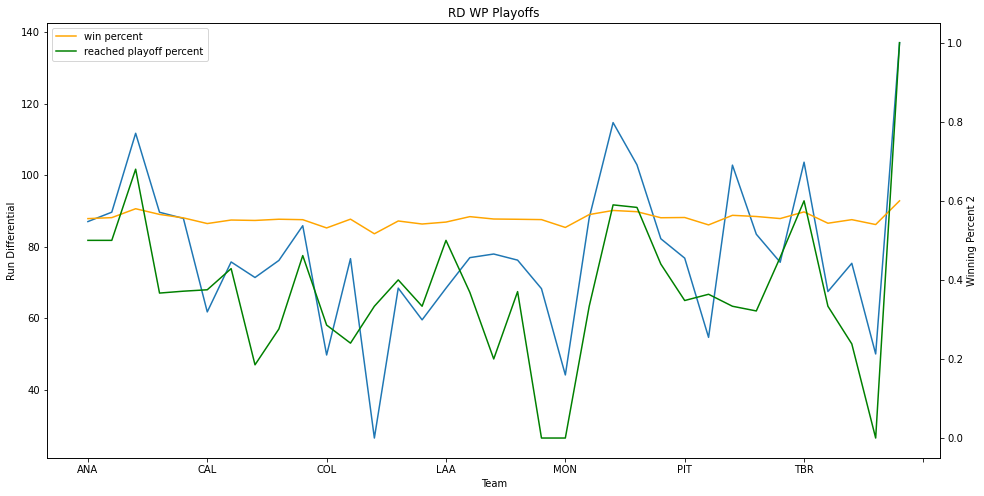

In [8]:
filter=df['RD']>0

grouped=df[filter].groupby(['Team'])['RD'].mean()
grouped2=df[filter].groupby(['Team'])['WP2'].mean()
grouped3=df[filter].groupby(['Team'])['Playoffs'].sum()/df[filter].groupby(['Team'])['Playoffs'].count()
#print(grouped,grouped2)
plt.clf()
fig,ax=plt.subplots(figsize=(16,8))
plt.title('RD WP Playoffs')
grouped.plot(ax=ax)
plt.ylabel('Run Differential')
ax2=ax.twinx()
plt.xticks(rotation=90)
plt.ylabel('Winning Percent 2')
grouped2.plot(ax=ax2,c='orange')
grouped3.plot(ax=ax2,c='green')
ax2.legend(['win percent','reached playoff percent'])
plt.show()


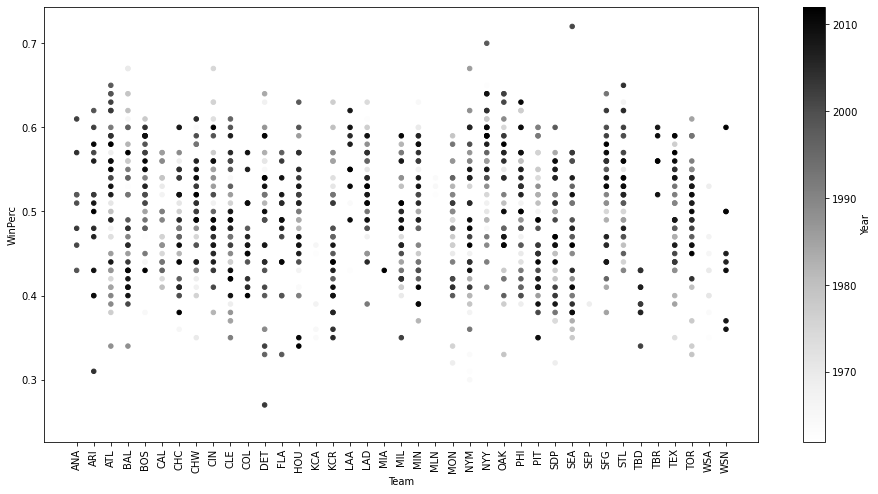

In [77]:
grouped=df.groupby(['Team','Year'])['W'].sum().reset_index()
grouped2=df.groupby(['Team','Year'])['WP2'].sum().reset_index()
grouped3=df.groupby(['Team','Year'])['WP'].sum().reset_index()
grouped4=df.groupby(['Team','Year'])['Playoffs'].sum().reset_index()

grouped=grouped.merge(grouped2,on=['Team','Year'])
grouped=grouped.merge(grouped3,on=['Team','Year'])
grouped=grouped.merge(grouped4,on=['Team','Year'])
#print(grouped)


#for row_tuple in grouped.items():
#    print(row_tuple)
team_wins_df=pd.DataFrame(grouped)
#,dtype={"Team":str,"Year":np.int32,"W":np.int32}
team_wins_df=team_wins_df.rename({'W':'Wins','WP':'WinPerc','WP2':'WinPerc2'},axis=1)
team_wins_df['Wins']=team_wins_df['Wins'].astype(np.int32)
team_wins_df.reset_index()

#print(team_wins_df)
fig,ax = plt.subplots(figsize=(16,8))
team_wins_df.plot.scatter(x='Team',y='WinPerc',ax=ax,c='Year')
plt.xticks(rotation=90)
plt.show()



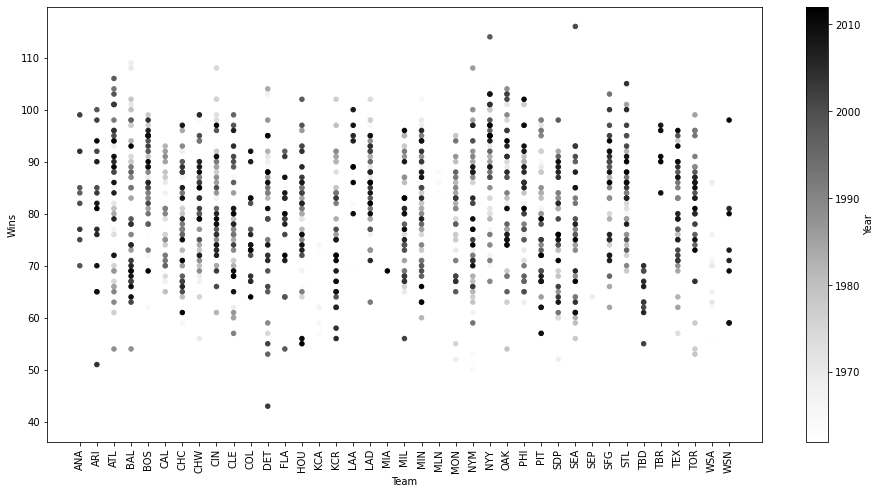

In [76]:
fig,ax = plt.subplots(figsize=(16,8))

team_wins_df.plot.scatter(x='Team', y='Wins', ax=ax,c='Year')
plt.xticks(rotation=90)
plt.show()


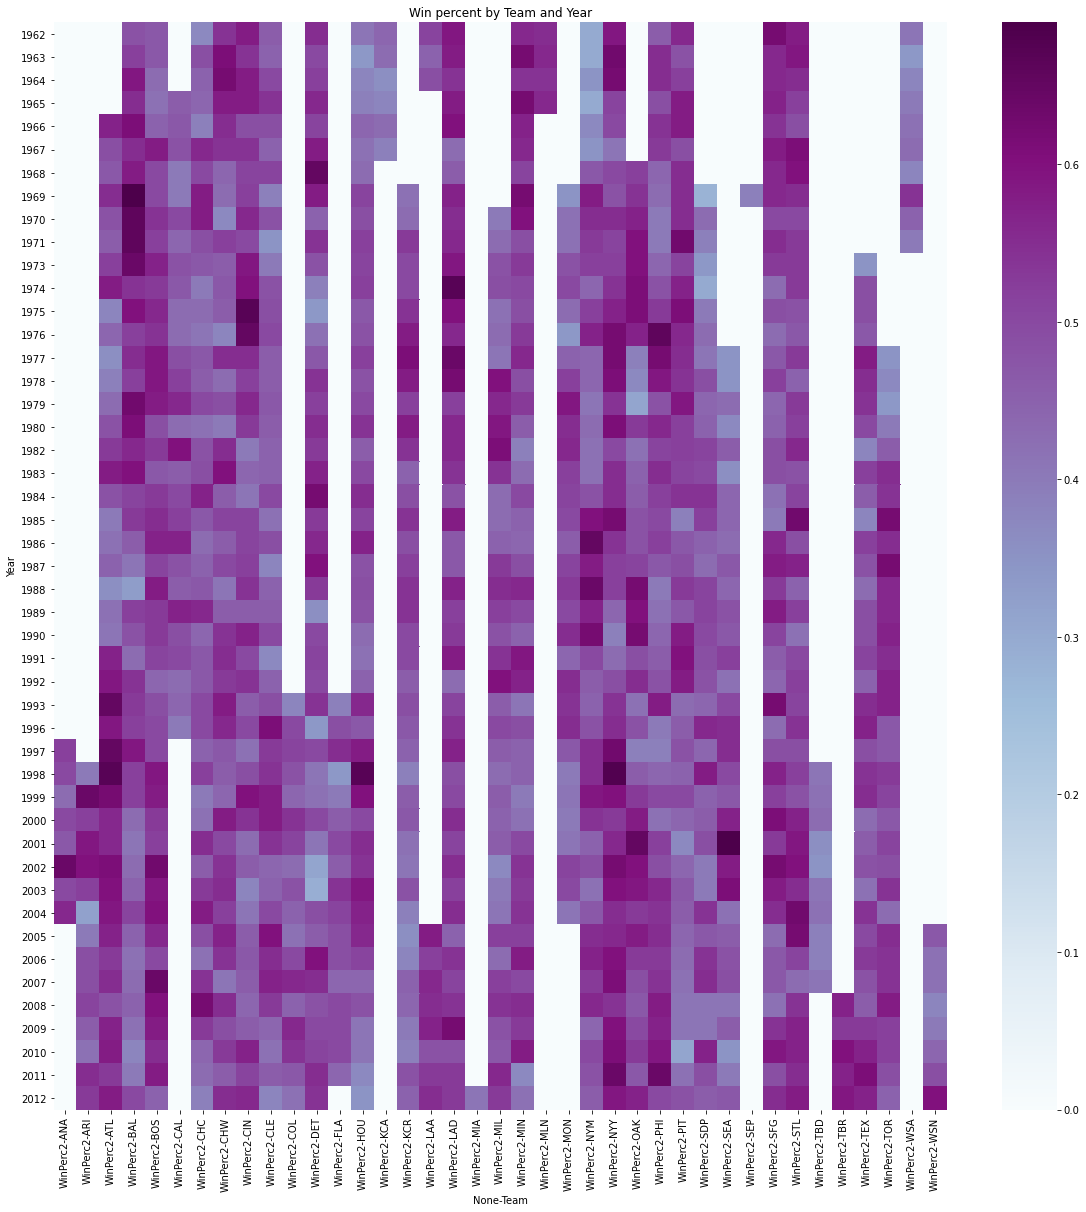

The darker color signals a higher win percent


In [92]:
fp=team_wins_df.pivot_table(index=['Year'],columns=['Team'],values=['WinPerc2'],aggfunc='sum').fillna(0)
fp = fp[(fp.T != 0).any()]

fig,ax=plt.subplots(figsize=(20,20))
plt.title('Win percent by Team and Year')
sns.heatmap(fp,cmap='BuPu',linecolor='black',linewidths=0, ax=ax)
plt.show()
print("The darker color signals a higher win percent")

In [105]:
filter=team_wins_df['Team']=='CIN'
for row_tuple in team_wins_df[filter].itertuples():
    print(row_tuple.Team,row_tuple.Year,row_tuple.Wins,row_tuple.WinPerc2)

CIN 1962 98 0.58
CIN 1963 86 0.54
CIN 1964 92 0.58
CIN 1965 89 0.58
CIN 1966 76 0.49
CIN 1967 87 0.54
CIN 1968 83 0.51
CIN 1969 89 0.52
CIN 1970 102 0.56
CIN 1971 79 0.5
CIN 1973 99 0.59
CIN 1974 98 0.6
CIN 1975 108 0.67
CIN 1976 102 0.65
CIN 1977 88 0.55
CIN 1978 92 0.52
CIN 1979 90 0.56
CIN 1980 89 0.53
CIN 1982 61 0.4
CIN 1983 74 0.44
CIN 1984 70 0.41
CIN 1985 89 0.51
CIN 1986 86 0.51
CIN 1987 84 0.52
CIN 1988 87 0.54
CIN 1989 75 0.46
CIN 1990 91 0.57
CIN 1991 74 0.5
CIN 1992 90 0.54
CIN 1993 73 0.46
CIN 1996 81 0.5
CIN 1997 76 0.42
CIN 1998 77 0.49
CIN 1999 96 0.6
CIN 2000 85 0.54
CIN 2001 66 0.43
CIN 2002 78 0.46
CIN 2003 69 0.38
CIN 2004 76 0.41
CIN 2005 73 0.46
CIN 2006 80 0.47
CIN 2007 72 0.46
CIN 2008 74 0.44
CIN 2009 78 0.46
CIN 2010 91 0.57
CIN 2011 79 0.51
CIN 2012 97 0.56


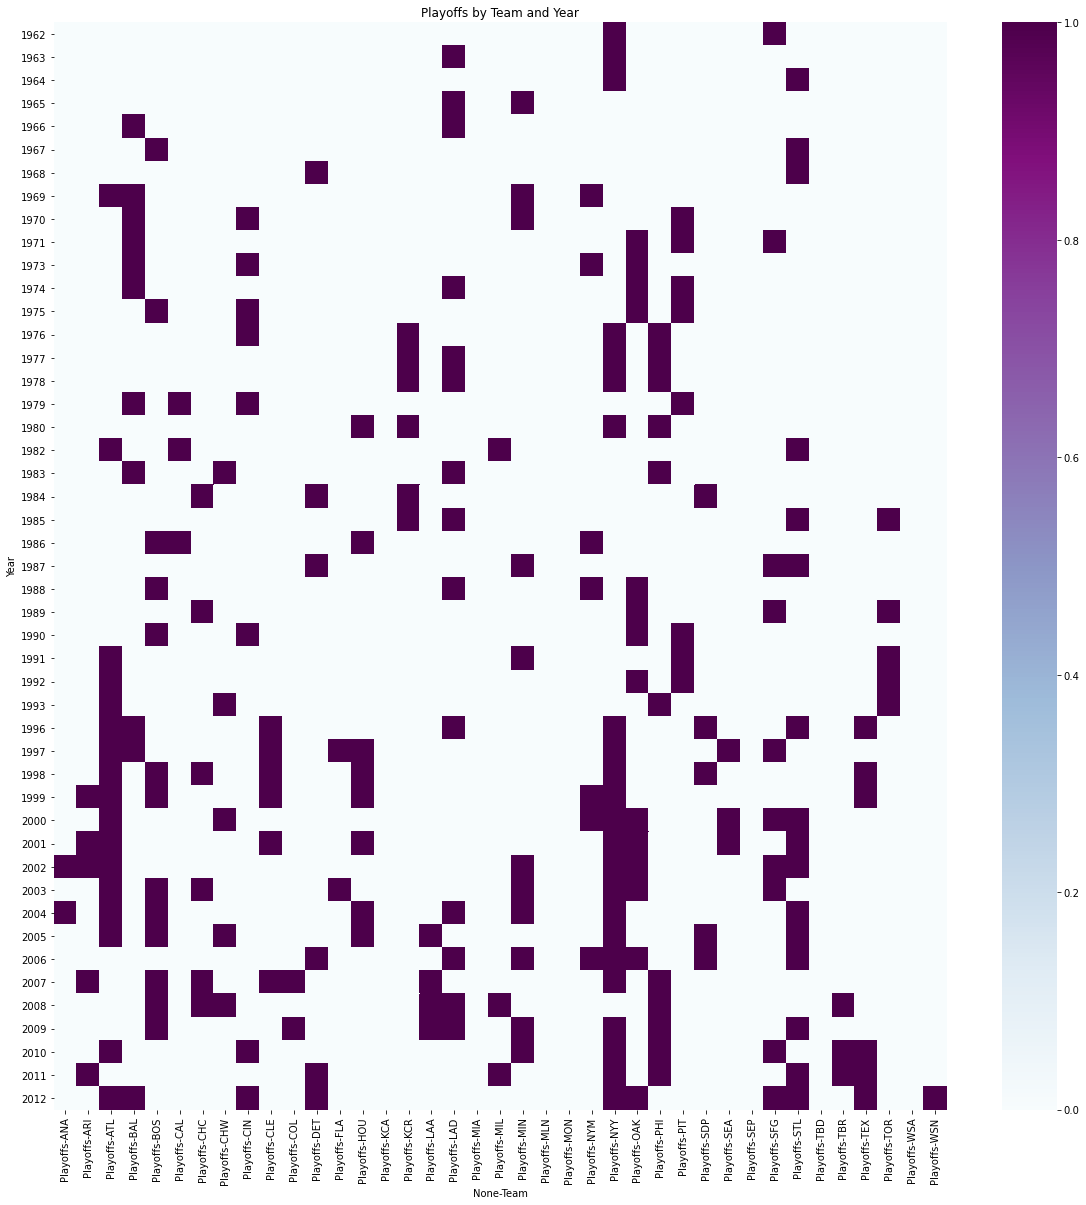

Map of playoff frequencies


In [107]:
fp=team_wins_df.pivot_table(index=['Year'],columns=['Team'],values=['Playoffs'],aggfunc='sum').fillna(0)
fp = fp[(fp.T != 0).any()]

fig,ax=plt.subplots(figsize=(20,20))
plt.title('Playoffs by Team and Year')
sns.heatmap(fp,cmap='BuPu',linecolor='black',linewidths=0, ax=ax)
plt.show()
print("Map of playoff frequencies")

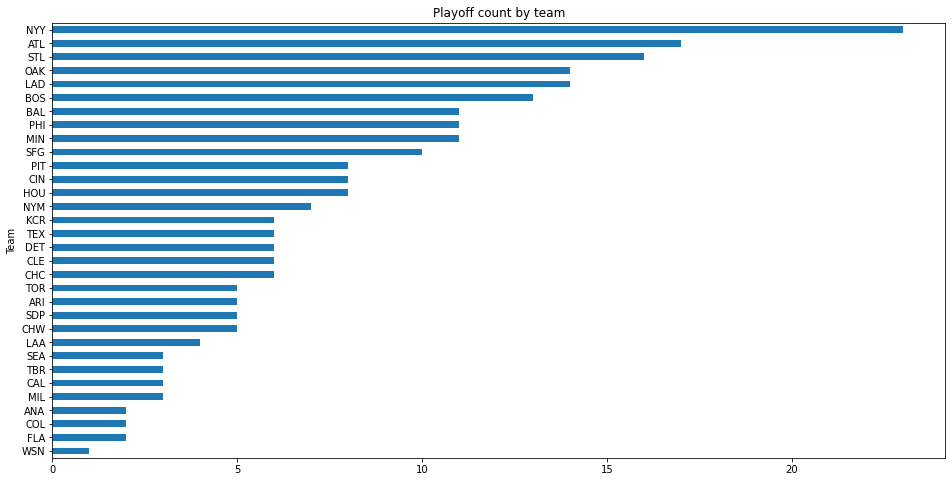

In [144]:
filter=team_wins_df['Playoffs']>0
grouped=team_wins_df[filter].groupby(['Team'])['Playoffs'].sum()

fig,ax=plt.subplots(figsize=(16,8))
grouped.sort_values().plot.barh(ax=ax)
plt.title("Playoff count by team")
plt.show()